# BM40A1401 GPU Computing

## Erik Kuitunen

### Exercise 3

In [151]:
import cupy as cp
import numpy as np 
import matplotlib.pyplot as plt 
import time

#### Task 1
Both NumPy and CuPy offer the linear algebra functions  linalg.norm() to get the norm and linalg.qr() to get the QR decomposition of matrices.

Time their performance against different sizes of square matrices.

Creating data and perfroming the calculations

In [152]:
N = [ 10, 100, 500, 1000, 2000, 3000, 4000 ] 

times_cpu = np.zeros( ( np.size( N ), 2 ) )
times_gpu = np.zeros( ( np.size( N ), 2 ) )

ii = 0
for elem in N:
    
    # CPU measurements
    a_cpu = np.random.randn( elem, elem )
    
    start_time = time.perf_counter()
    res = np.linalg.norm( a_cpu )
    end_time = time.perf_counter()

    times_cpu[ ii, 0 ] = ( end_time - start_time )*1000
    
    start_time = time.perf_counter()
    res = np.linalg.qr( a_cpu )
    end_time = time.perf_counter()

    times_cpu[ ii, 1 ] = ( end_time - start_time )*1000
    
    
    # GPU measurements
    a_gpu = cp.random.randn( elem, elem )
    
    start_time = time.perf_counter()
    res = cp.linalg.norm( a_gpu )
    end_time = time.perf_counter()
    
    times_gpu[ ii, 0 ] = ( end_time - start_time )*1000
    
    start_time = time.perf_counter()
    res = cp.linalg.qr( a_gpu )
    end_time = time.perf_counter()
    
    times_gpu[ ii, 1 ] = ( end_time - start_time )*1000
    
    ii += 1
    

Visualizing results

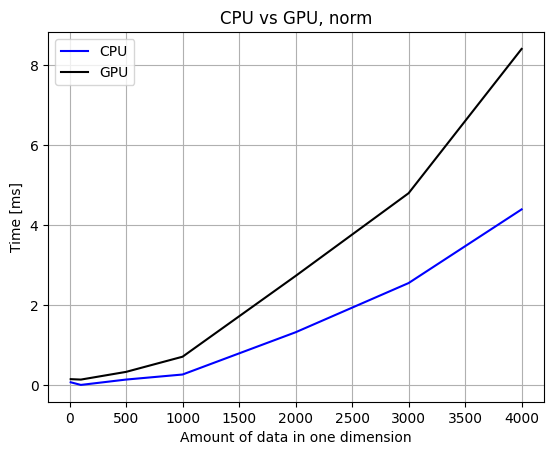

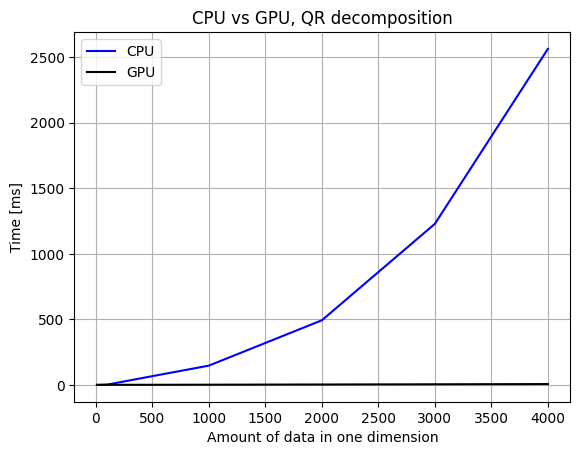

In [153]:
plt.plot( N, times_cpu[ :, 0 ], 'b', label = "CPU" )
plt.plot( N, times_gpu[ :, 0 ], 'k', label = "GPU")

plt.title( "CPU vs GPU, norm")
plt.xlabel( 'Amount of data in one dimension' )
plt.ylabel( 'Time [ms]' )
plt.legend( loc = "upper left" )
plt.grid()

plt.show()

plt.plot( N, times_cpu[ :, 1 ], 'b', label = "CPU")
plt.plot( N, times_gpu[ :, 1 ], 'k',label = "GPU")

plt.title( "CPU vs GPU, QR decomposition")
plt.xlabel( 'Amount of data in one dimension')
plt.ylabel( 'Time [ms]' )
plt.legend( loc = "upper left" )
plt.grid()

plt.show()

#### Task 2
Implement vector addition using NumPy, CuPy and an example kernel used in previous exercises. Time their performance against different vector sizes.

The same N vector as in previous task will be used.

In [166]:
test = range(5)

# NumPy vector addition
def vecAdd_numpy( a, b ):
    
    vector_length = np.size(a)
    c = np.zeros( ( vector_length, 1) )

    for ii in range( vector_length ):
        c[ ii ] = a[ii] + b[ii]
    return c

# CuPy vector addition
def vecAdd_cupy( a, b ):
    
    # Moving from device to host if not already done
    if not ( isinstance( a, cp.ndarray ) & isinstance( b, cp.ndarray ) ):
        a = cp.array(a)
        b = cp.array(b)
        
    vector_length = cp.size(a)
    c = cp.zeros( ( vector_length, 1) )

    for ii in range( vector_length ):
        c[ ii ] = a[ii] + b[ii]
    return c
    
# Kernel for vector addition



print( vecAdd_cupy(test, test))


[[0.]
 [2.]
 [4.]
 [6.]
 [8.]]
